# Multas Demo

Multas tránsito, Perú enero setiembre 2017

In [92]:
import pandas as pd
import sys
import os
import pip
import types
cos_sdk_path = ''.join([os.getenv('NOTEBOOK_HOME', 'NOT_DEFINED').split('/notebook')[0], '/notebook/lib/ibm-cos-sdk'])
sys.path.insert(0,cos_sdk_path)
if not('ibm-cos-sdk' in [package.project_name for package in pip.get_installed_distributions()]) and cos_sdk_path.startswith('NOT_DEFINED'):
    !pip install ibm-cos-sdk -q

import pandas as pd
from botocore.client import Config
import boto3

def __iter__(self): return 0

client_be7db3781e8445cfb0dcd492b4a33847 = boto3.client(service_name='s3',
    ibm_api_key_id='vCbAtO8oxs_FVuzkPQuioeu38hYSUnrOioudhFArHR37',
    ibm_service_instance_id="iam-ServiceId-8cef9705-8413-48a0-a76c-d4b9eef2d189",
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

streaming_body_1 = client_be7db3781e8445cfb0dcd492b4a33847.get_object(Bucket='perpredictmodelsd5bc02129ae542398c59b6bde9e739d9', Key='multas_transito_minimal.txt')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

dataset = pd.read_table(streaming_body_1)

dataset.head()

,Código falta,Tipo formato,Nivel de gravedad,Año pago,Mes pago,Cant. multas con pagos,Importe pagado (S/),Reincidencia pagada (S/)
0,C28,Papeleta de Tránsito,G,2017,7,1,80.00,0.00
1,C28,Papeleta de Tránsito,G,2017,5,1,80.00,0.00
2,E22,Papeleta de Tránsito,G,2017,3,1,80.00,0.00
3,A12,Papeleta de Tránsito,L,2017,5,1,40.00,0.00
4,E02,Papeleta de Tránsito,G,2017,9,1,80.00,0.00


In [121]:
set_tipo_formato=set(dataset['Tipo formato'])
tipo_formato=list(set_tipo_formato) # [ tipo for tipo in (set_tipo_formato) ]
tipo_formato=[ [i+1,tipo_formato[i]] for i in range(len(tipo_formato)) ]

set_nivel_gravedad=set(dataset['Nivel de gravedad'])
nivel_gravedad=list(set_nivel_gravedad)
nivel_gravedad=[ [i+1,nivel_gravedad[i]] for i in range(len(nivel_gravedad)) ]

def getIdTipoFormato(nameTipoForm):
    for tp in tipo_formato:
        if tp[1]==nameTipoForm:
            return tp[0]
    return 0

def getIdNivelGravedad(nameNivelGrav):
    for ng in nivel_gravedad:
        if ng[1]==nameNivelGrav:
            return ng[0]
    return 0

cant_mes=[.0,.0,.0,.0,.0,.0,.0,.0,.0]
for index,row in dataset.iterrows():
    if row['Mes pago']-1 < 9:
        cant_mes[row['Mes pago']-1] += float(str(row['Cant. multas con pagos']).replace(',',''))
        
total_mes=[.0,.0,.0,.0,.0,.0,.0,.0,.0]
for index,row in dataset.iterrows():
    if row['Mes pago']-1 < 9:
        total_mes[row['Mes pago']-1] += float(str(row['Importe pagado (S/)']).replace(',',''))

##  Multas Pagadas
Nro de Multas y Total en S/.

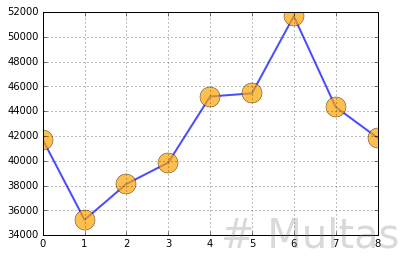

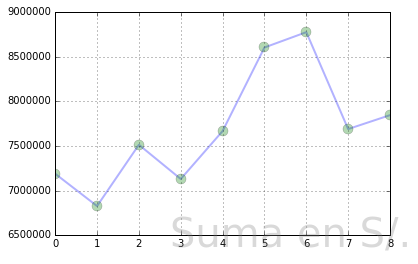

In [127]:
import numpy as np
import matplotlib.pyplot as plt

#Cantidad
figC, axC = plt.subplots()
axC.plot(cant_mes, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
axC.grid()

# label
figC.text(0.95, 0.05, '# Multas',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.3)

#Total en S/.
figT, axT = plt.subplots()
axT.plot(total_mes, '-o', ms=10, lw=2, alpha=0.3, mfc='green')
axT.grid()

# label
figT.text(0.95, 0.05, 'Suma en S/.',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.3)
plt.show()

## Modelo predictivo
Estimación de monto que se cobrará en los meses proximo y próximo años
